In [1]:
# Importando bibliotecas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importando base de dados

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_PassengerId = test_df["PassengerId"]

In [3]:
# Colunas do dataframe

train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Descrição das colunas
    1.PassengerId: ID único do passageiro
    2.Survived: passageiro sobreviveu(1) ou mnorreu(0)
    3.Pclass: classe do passageiro
    4.Name: nome
    5.Sex: sexo do passageiro
    6.Age: idade do passageiro
    7.SibSp: número de irmãos/cônjuge
    8.Parch: numero de pais/filhos
    9.Ticket: numero da passagem
    10.Fare: valor da passagem
    11..Cabin: categoria da cabine
    12.Embarked: porto em que o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Tipo das colunas
 - float64(2): Fare, Age
 - int64(5): Pclass, sibsp, parch, passengerId and survived
 - object(5): Cabin, embarked, ticket, name and sex

In [7]:
# Função responsável por gerar gráficos de barra para as features categoricas
def bar_plot(feature):
    
    var = train_df[feature]
    
    qtd = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(qtd.index, qtd)
    plt.xticks(qtd.index, qtd.index.values)
    plt.ylabel("Frequência")
    plt.title(feature)
    plt.show()
    print(f"{feature}: \n {qtd}")

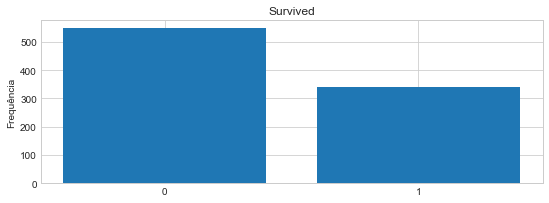

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


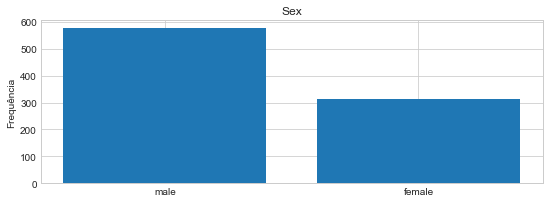

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


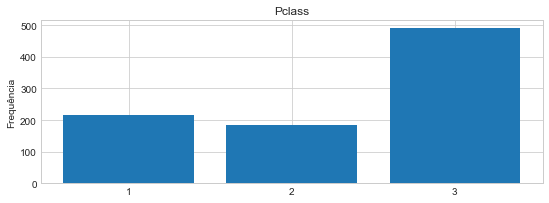

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


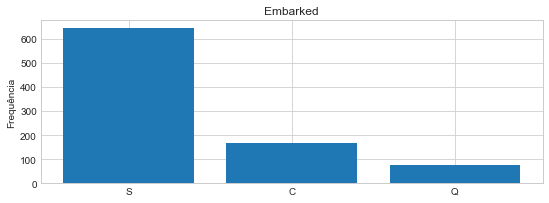

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


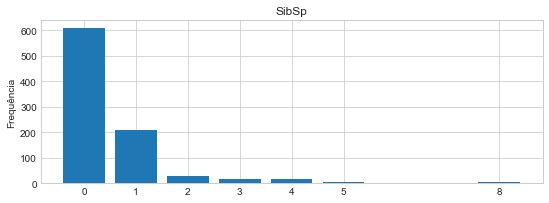

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


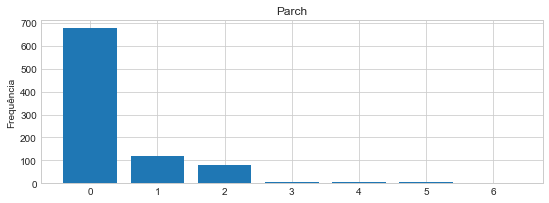

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
features_categoricas = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for categoria in features_categoricas:
    bar_plot(categoria)

In [9]:
# Função responsável por gerar histogramas para as features numéricas
def plot_hist(feature):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[feature], bins = 20)
    plt.xlabel(feature)
    plt.ylabel("Frequência")
    plt.title(feature)
    plt.show()

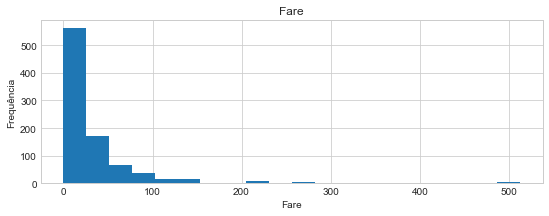

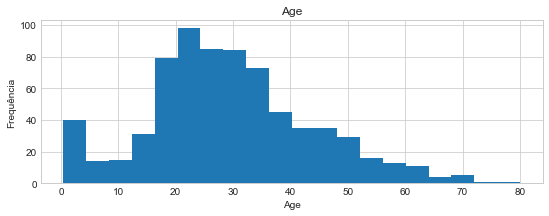

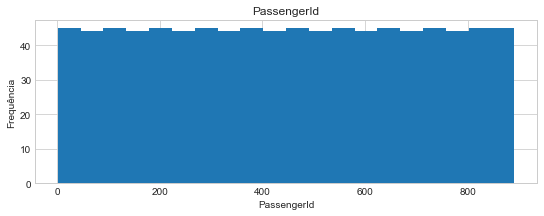

In [10]:
features_numericas = ["Fare", "Age","PassengerId"]
for vn in features_numericas:
    plot_hist(vn)

#### Iremos realizar a comparação de algumas features com a coluna survived
 - Pclass
 - Sex
 - SibSp
 - Parch

In [11]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
# Função responsável por detectar outliers
def detect_outliers(df,features):
    outlier_indices = []
    
    for feature in features:
        Q1 = np.percentile(df[feature],25)
        Q3 = np.percentile(df[feature],75)
        amplitude = Q3 - Q1
        limites = amplitude * 1.5
        lista_colunas_outliers = df[(df[feature] < Q1 - limites) | (df[feature] > Q3 + limites)].index
              
        outlier_indices.extend(lista_colunas_outliers)
    
    outlier_indices = Counter(outlier_indices)
    remover_indices = list(i for i, v in outlier_indices.items() if v > 2)
    
    return remover_indices

In [16]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
# Removendo outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

### Iremos tratar os valores NaN

In [18]:
# concatenando os dois dfs
# train_df_len criada para utilizar futuramente na separação dos dfs

train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [19]:
# Localizar as colunas que contêm valores NaN
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [20]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [21]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


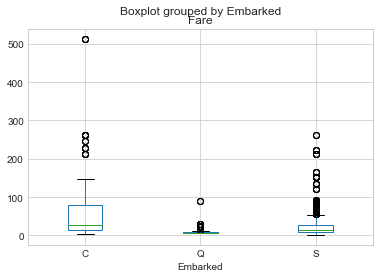

In [22]:
# Verificando qual porto possuí mais valores

train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [23]:
# Atribuindo C para os valores NaN da coluna Embarked

train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [24]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [25]:
# Preenchendo o valor NaN da coluna Fare com a média paga para o Pclass 3

train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [26]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Iniciando data visualization

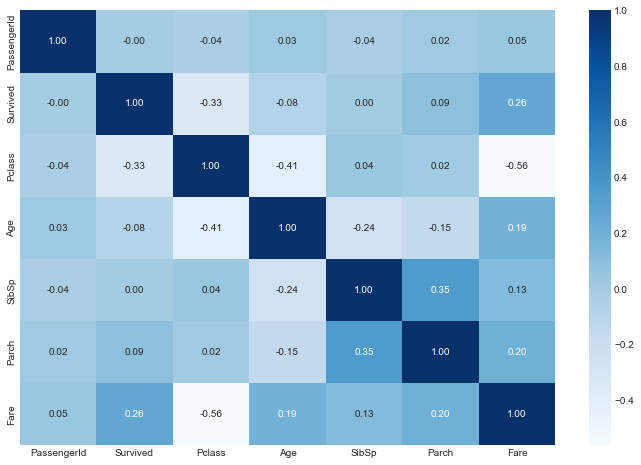

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot = True, fmt = ".2f", cmap='Blues')
plt.show()

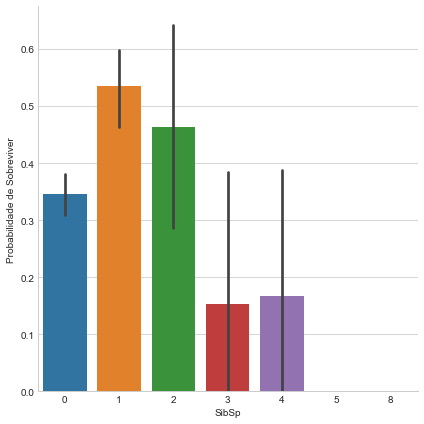

In [28]:
grafico = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
grafico.set_ylabels("Probabilidade de Sobreviver")
plt.show()

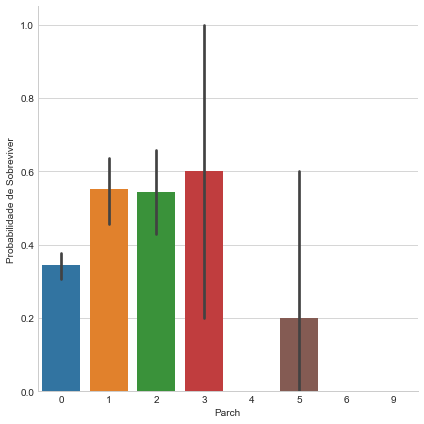

In [29]:
grafico = sns.factorplot(x = "Parch", y = "Survived", data = train_df, kind = "bar", size = 6)
grafico.set_ylabels("Probabilidade de Sobreviver")
plt.show()

### Podemos verificar que famílias menores possuem mais chance de sobrevivência

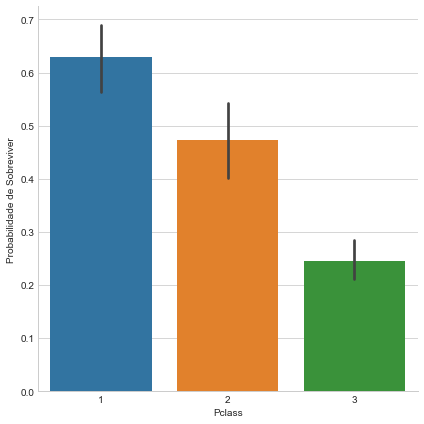

In [30]:
grafico = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
grafico.set_ylabels("Probabilidade de Sobreviver")
plt.show()

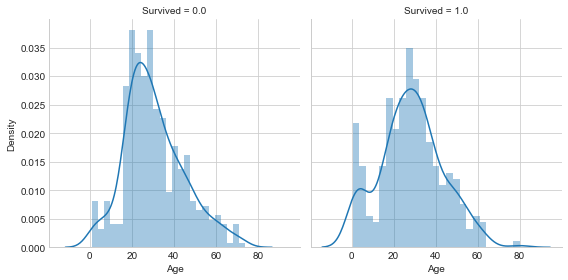

In [31]:
grafico = sns.FacetGrid(train_df, col = "Survived", size = 4)
grafico.map(sns.distplot, "Age", bins = 25)
plt.show()

 - Passageiros com 10 anos ou menos possuem maiores chances de sobreviver
 - Passageiros com 80 anos ou mais sobreviveram
 - A maioria dos passageiros estão entre 15 e 35 anos

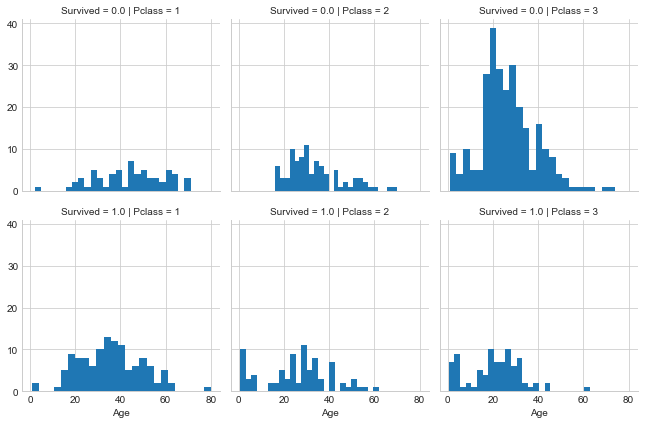

In [32]:
grafico = sns.FacetGrid(train_df, col = "Pclass", row = "Survived", size = 3)
grafico.map(plt.hist, "Age", bins = 25)
grafico.add_legend()
plt.show()

 - Pclass possue uma alta relação com os sobreviventes

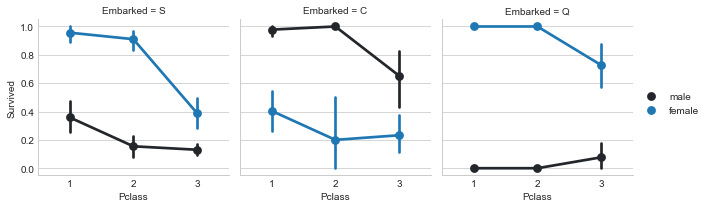

In [33]:
grafico = sns.FacetGrid(train_df, col = "Embarked", size = 3)
grafico.map(sns.pointplot, "Pclass","Survived","Sex")
grafico.add_legend()
plt.show()

 - Mulheres possuem maiores chances de sobreviver se comparado com os homens

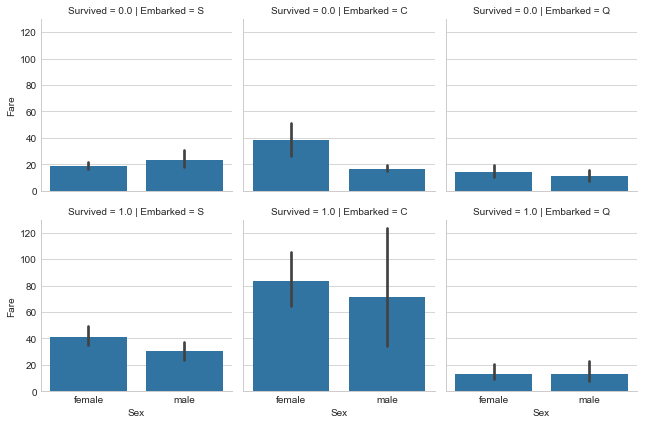

In [34]:
grafico = sns.FacetGrid(train_df, row = "Survived", col = "Embarked", size = 3)
grafico.map(sns.barplot, "Sex", "Fare")
grafico.add_legend()
plt.show()

 - Os valores pagos nas passagens possuem alta relevância na chance de sobreviver

In [35]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Iremos preencher os valores NaN:

 - #### Age

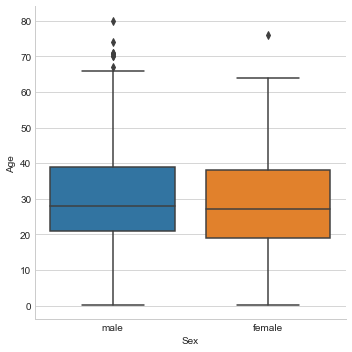

In [36]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

 - As idades entre homens e mulheres são similares, sendo assim, não conseguimos usar essa feature para preenchimento dos valores NaN

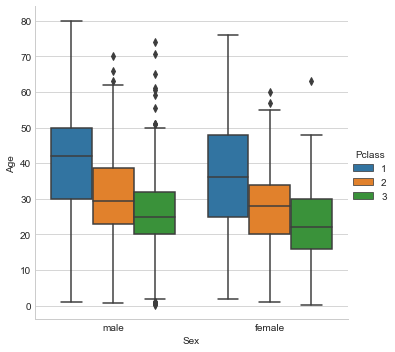

In [37]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

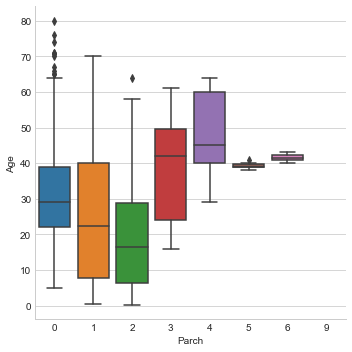

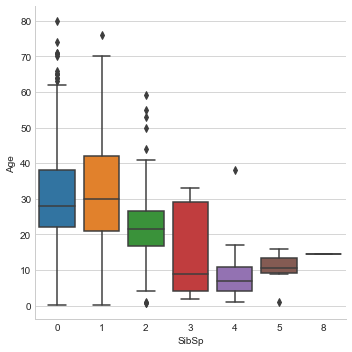

In [38]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

 - Parch possui uma relação com a idade

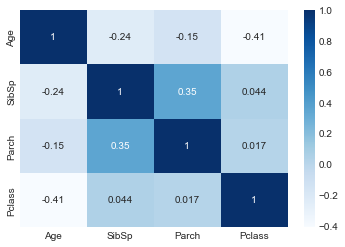

In [39]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True, cmap = "Blues")
plt.show()

In [40]:
indices_idade_nan = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in indices_idade_nan:
    idade_calculada = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    idade_mediana = train_df["Age"].median()
    if not np.isnan(idade_calculada):
        train_df["Age"].iloc[i] = idade_calculada
    else:
        train_df["Age"].iloc[i] = idade_mediana

In [41]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


 - #### Os valores NaN faltantes são da Cabin, porém iremos remove-la do nosso dataframe

In [42]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

 - #### Tamanho da familia

In [43]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [44]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fsize
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


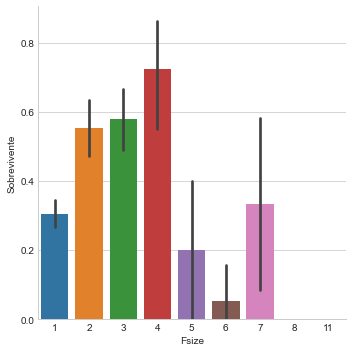

In [45]:
grafico = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
grafico.set_ylabels("Sobrevivente")
plt.show()

 - Familias menores possuem maiores chances de sobrevivência

 - #### Embarked

In [46]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

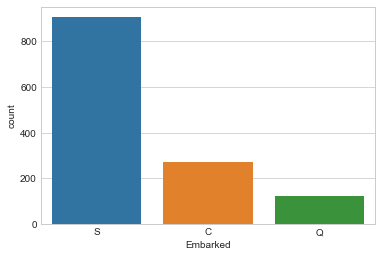

In [47]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [48]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Fsize,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,0,0,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,0,0,1


 - #### Sex

In [49]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Fsize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,0,1,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,1,0,0,1,0
2,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1,1,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0,0,1,1,0
4,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1,0,1


### Iremos começar a modelagem

In [50]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [51]:
train_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [52]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [53]:
train = train_df[:train_df_len]

In [54]:
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Precisão Treino: % {}".format(acc_log_train))
print("Precisão Teste: % {}".format(acc_log_test))

Precisão Treino: % 79.83
Precisão Teste: % 79.73
